In [232]:
# perfusion_analysis.ipynb
# Avery Krieger 05/25/2023

# Analyzes and creates figures for AstA perfusion experiments

from visanalysis.analysis import imaging_data, shared_analysis

from matplotlib.colorbar import ColorbarBase
from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy import stats as st
import matplotlib as mpl
import os
from pathlib import Path
import numpy as np
# import seaborn as sns
# import pandas as pd

In [233]:
# Type 1

## Fly 1 - Proximal only
t1_fly1_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "1", "mi1_proximal_multiple"]]
t1_fly1_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "2", "mi1_proximal_multiple"]]
t1_fly1_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "3", "mi1_proximal_multiple"]]
## Fly 2 - Proximal only
t1_fly2_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "4", "mi1_proximal_multiple"]]
t1_fly2_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "5", "mi1_proximal_multiple"]]
t1_fly2_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "6", "mi1_proximal_multiple"]]
## Fly 3 - Proximal, Medial, Distal
### Proximal
t1_fly3_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "10", "mi1_proximal_multiple"]]
t1_fly3_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "11", "mi1_proximal_multiple"]]
t1_fly3_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "12", "mi1_proximal_multiple"]]
### Medial
t1_fly3_pre_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "10", "mi1_medial_multiple"]]
t1_fly3_perf_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "11", "mi1_medial_multiple"]]
t1_fly3_post_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "12", "mi1_medial_multiple"]]
### Distal
t1_fly3_pre_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "10", "mi1_distal_multiple"]]
t1_fly3_perf_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "11", "mi1_distal_multiple"]]
t1_fly3_post_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "12", "mi1_distal_multiple"]]

# Lists of fly IDs
t1_fly_list_prox = [1, 2, 3]
t1_fly_list_dist = [3]

# Concatenating by block
t1_pre_prox = np.concatenate((t1_fly1_pre_prox, t1_fly2_pre_prox, t1_fly3_pre_prox), axis=0)
t1_perf_prox = np.concatenate((t1_fly1_perf_prox, t1_fly2_perf_prox, t1_fly3_perf_prox), axis=0)
t1_post_prox = np.concatenate((t1_fly1_post_prox, t1_fly2_post_prox, t1_fly3_post_prox), axis=0)

#------------------------------------------------------------

# Type 2
## Fly 1 - Proximal and distal
### Proximal
t2_fly1_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "10", "mi1_proximal_multiple"]]
t2_fly1_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "13", "mi1_proximal_multiple"]]
t2_fly1_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "14", "mi1_proximal_multiple"]]
### Distal
t2_fly1_pre_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "10", "mi1_distal_multiple"]]
t2_fly1_perf_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "13", "mi1_distal_multiple"]]
t2_fly1_post_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "14", "mi1_distal_multiple"]]
## Fly 2 - Proximal and distal
### Proximal
t2_fly2_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "15", "mi1_proximal_multiple"]]
t2_fly2_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "16", "mi1_proximal_multiple"]]
t2_fly2_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "18", "mi1_proximal_multiple"]]
### Distal
# t2_fly2_pre_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "15", "mi1_distal_multiple"]]
# t2_fly2_perf_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "16", "mi1_distal_multiple"]]
# t2_fly2_post_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "18", "mi1_distal_multiple"]]
## Fly 3 - Proximal and distal
### Proximal - center, surround, both (all)
t2_fly3_pre_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_proximal_all"]]
t2_fly3_pre_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_proximal_center"]]
t2_fly3_pre_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_proximal_surround"]]
t2_fly3_perf_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_proximal_all"]]
t2_fly3_perf_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_proximal_center"]]
t2_fly3_perf_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_proximal_surround"]]
t2_fly3_post_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_proximal_all"]]
t2_fly3_post_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_proximal_center"]]
t2_fly3_post_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_proximal_surround"]]
### Distal - all only
t2_fly3_pre_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_distal_all"]]
t2_fly3_perf_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_distal_all"]]
t2_fly3_post_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_distal_all"]]
## Fly 4 - Proximal and distal
### Proximal - center, surround, both (all)
t2_fly4_pre_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_proximal_all"]]
t2_fly4_pre_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_proximal_center"]]
t2_fly4_pre_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_proximal_surround"]]
t2_fly4_perf_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_proximal_all"]]
t2_fly4_perf_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_proximal_center"]]
t2_fly4_perf_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_proximal_surround"]]
t2_fly4_post_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_proximal_all"]]
t2_fly4_post_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_proximal_center"]]
t2_fly4_post_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_proximal_surround"]]
### Distal - all only
t2_fly4_pre_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_distal_all"]]
t2_fly4_perf_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_distal_all"]]
t2_fly4_post_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_distal_all"]]

# Lists of fly IDs
t2_fly_list_prox = [1, 2, 3, 4]
t2_fly_list_dist = [1, 3, 4]

# Concatenate by block
t2_pre_prox_all = np.concatenate((t2_fly1_pre_prox, t2_fly2_pre_prox, t2_fly3_pre_prox_center, t2_fly4_pre_prox_center), axis=0)
t2_perf_prox_all = np.concatenate((t2_fly1_perf_prox, t2_fly2_perf_prox, t2_fly3_perf_prox_center, t2_fly4_perf_prox_center), axis=0)
t2_post_prox_all = np.concatenate((t2_fly1_post_prox, t2_fly2_post_prox, t2_fly3_post_prox_center, t2_fly4_post_prox_center), axis=0)

t2_pre_prox_center = np.concatenate((t2_fly3_pre_prox_center, t2_fly4_pre_prox_center), axis=0)
t2_perf_prox_center = np.concatenate((t2_fly3_perf_prox_center, t2_fly4_perf_prox_center), axis=0)
t2_post_prox_center = np.concatenate((t2_fly3_post_prox_center, t2_fly4_post_prox_center), axis=0)

t2_pre_prox_surround = np.concatenate((t2_fly3_pre_prox_surround, t2_fly4_pre_prox_surround), axis=0)
t2_perf_prox_surround = np.concatenate((t2_fly3_perf_prox_surround, t2_fly4_perf_prox_surround), axis=0)
t2_post_prox_surround = np.concatenate((t2_fly3_post_prox_surround, t2_fly4_post_prox_surround), axis=0)

t2_pre_dist_all = np.concatenate((t2_fly1_pre_dist, t2_fly3_pre_dist_all, t2_fly4_pre_dist_all), axis=0)
t2_perf_dist_all = np.concatenate((t2_fly1_perf_dist, t2_fly3_perf_dist_all, t2_fly4_perf_dist_all), axis=0)
t2_post_dist_all = np.concatenate((t2_fly1_post_dist, t2_fly3_post_dist_all, t2_fly4_post_dist_all), axis=0)

## concatenate all blocks
t2_prox_all = [t2_pre_prox_all, t2_perf_prox_all, t2_post_prox_all]
t2_dist_all = [t2_pre_dist_all, t2_perf_dist_all, t2_post_dist_all]
t2_prox_list = [1, 2, 3, 4]

# Center v surround
t2_prox_center = [t2_pre_prox_center, t2_perf_prox_center, t2_post_prox_center]
t2_prox_surround = [t2_pre_prox_surround, t2_perf_prox_surround, t2_post_prox_surround]
t2_center_surround_list = [3, 4]

#-------------------------------------------

# Concatenate all together - T1 and T2
all_pre_prox = np.concatenate((t1_pre_prox, t2_pre_prox_all), axis=0)
all_perf_prox = np.concatenate((t1_perf_prox, t2_perf_prox_all), axis=0)
all_post_prox = np.concatenate((t1_post_prox, t2_post_prox_all), axis=0)

all_pre_dist = np.concatenate((t1_fly3_pre_dist, t2_pre_dist_all), axis=0)
all_perf_dist = np.concatenate((t1_fly3_perf_dist, t2_perf_dist_all), axis=0)
all_post_dist = np.concatenate((t1_fly3_post_dist, t2_post_dist_all), axis=0)

all_prox = [all_pre_prox, all_perf_prox, all_post_prox]
all_dist = [all_pre_dist, all_perf_dist, all_post_dist]

all_fly_list = [1, 2, 3, 4, 5, 6, 7]
all_fly_list_prox = [1, 2, 3, 4, 5, 6, 7]
all_fly_list_dist = [3, 4, 5, 6, 7]

# Other lists for indexing and labeling
exp_layer = ["Proximal", "Medial", "Distal"]
exp_block_type = ["Pre", "Perfusion", "Wash"]

# NOTE: perhaps should make a list that has t1 as the center and then center from t2

save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/perfusion_analysis/"
Path(save_directory).mkdir(exist_ok=True)

In [234]:
#  function that pulls out the mean and sem responses
def getMetrics(which_experiment):
    file_path = os.path.join(which_experiment[0], which_experiment[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_experiment[2], quiet=True)
    roi_data = ID.getRoiResponses(which_experiment[3])

    # epoch_response is ROI x time x trial
    time_vector, epoch_response = ID.getEpochResponseMatrix(np.vstack(roi_data['roi_response']))

    # mean_response is ROI x time (trials have been averaged)
    _, mean_response, sem_response, _ = ID.getTrialAverages(epoch_response)
    # ('current_led_intensity', 'current_led_duration')
    # calc the sem + / -
    sem_plus = mean_response + sem_response
    sem_minus = mean_response - sem_response

    # calculate the mean, max, min for each trial
    # This is ROI x trials
    mean_by_rois = ID.getResponseAmplitude(epoch_response, metric='mean')
    max_by_rois = ID.getResponseAmplitude(epoch_response, metric='max')
    min_by_rois = ID.getResponseAmplitude(epoch_response, metric='min')
    # Average across ROIs, dimensions are (trials,)
    mean_by_trial = np.mean(mean_by_rois, axis=0)
    max_by_trial = np.mean(max_by_rois, axis=0)
    min_by_trial = np.mean(min_by_rois, axis=0)
    # SEM across ROIs - dimensions are (trials,)
    sem_mean_by_trial = np.std(mean_by_rois, axis=0) / np.sqrt(len(mean_by_trial))
    sem_max_by_trial = np.std(max_by_rois, axis=0) / np.sqrt(len(max_by_trial))
    sem_min_by_trial = np.std(min_by_rois, axis=0) / np.sqrt(len(min_by_trial))

    epoch_timestamps = ID.getEpochParameters('epoch_unix_time')   # sec
    epoch_timestamps = epoch_timestamps

    return time_vector, epoch_response, mean_response, sem_response, sem_plus, sem_minus, mean_by_rois, max_by_rois, min_by_rois, mean_by_trial, max_by_trial, min_by_trial, sem_mean_by_trial, sem_max_by_trial, sem_min_by_trial, epoch_timestamps

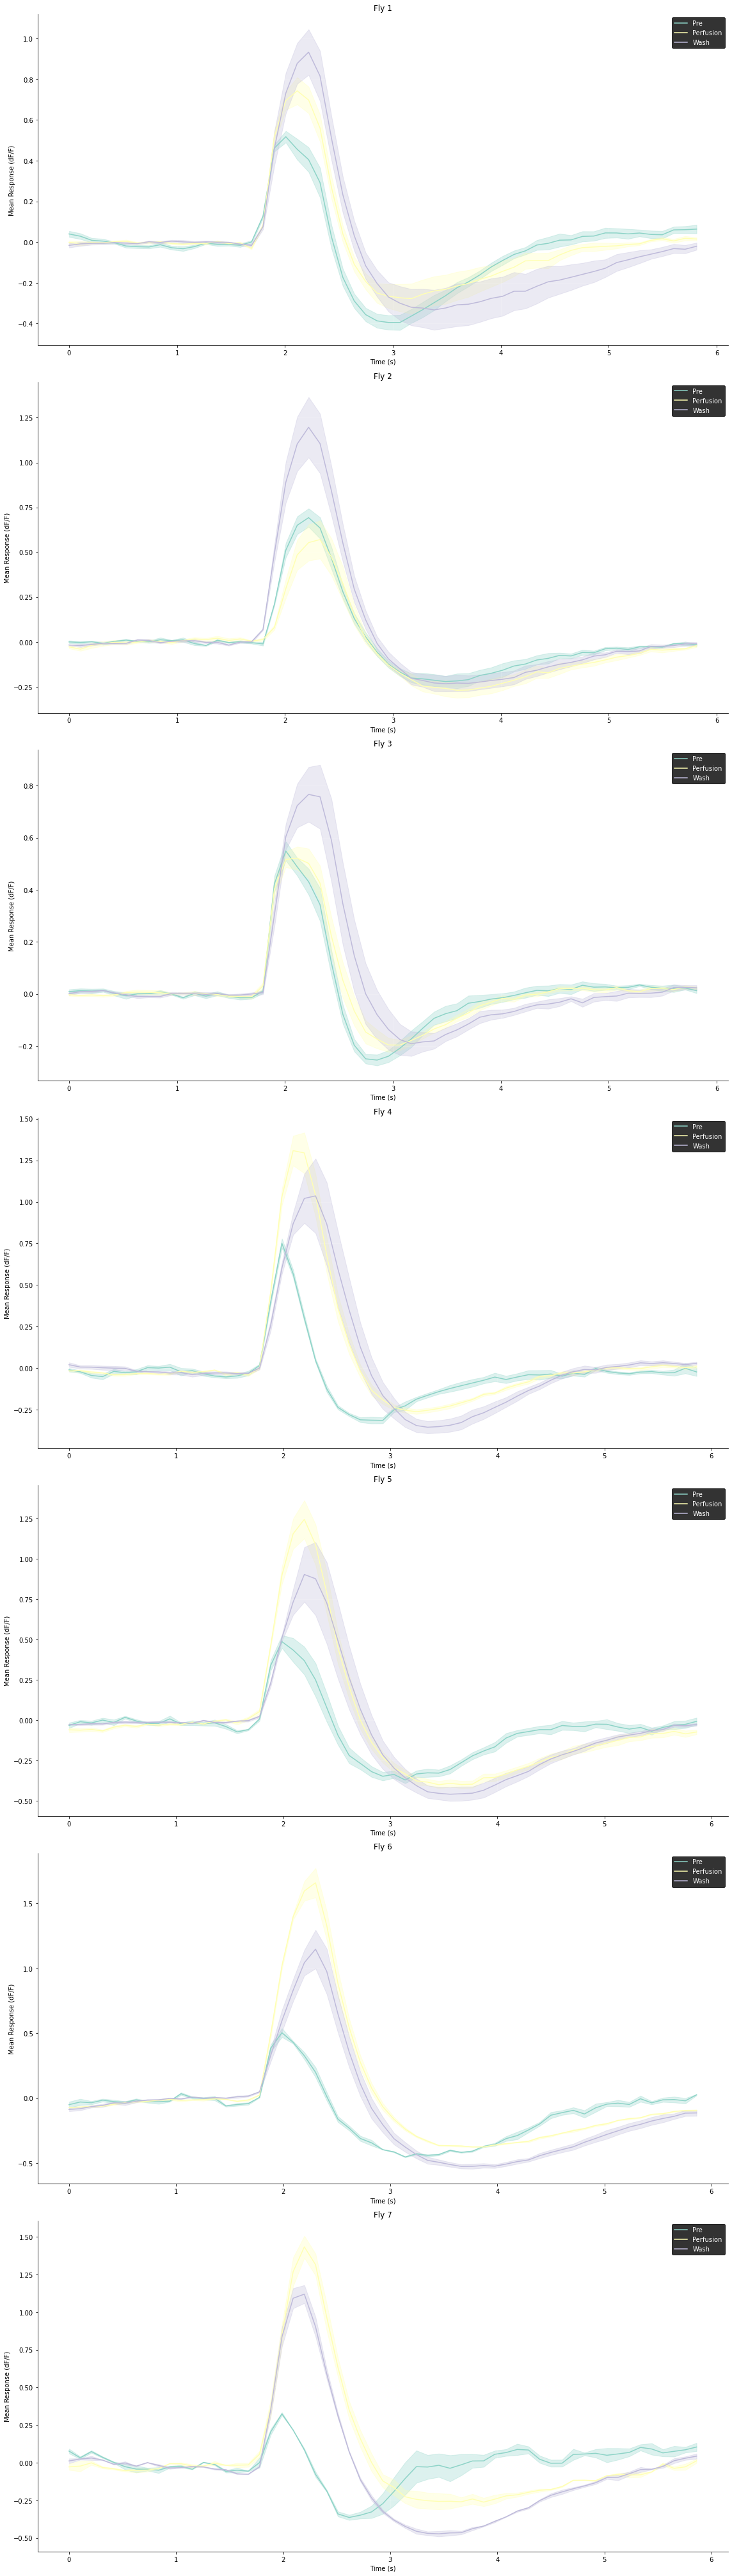

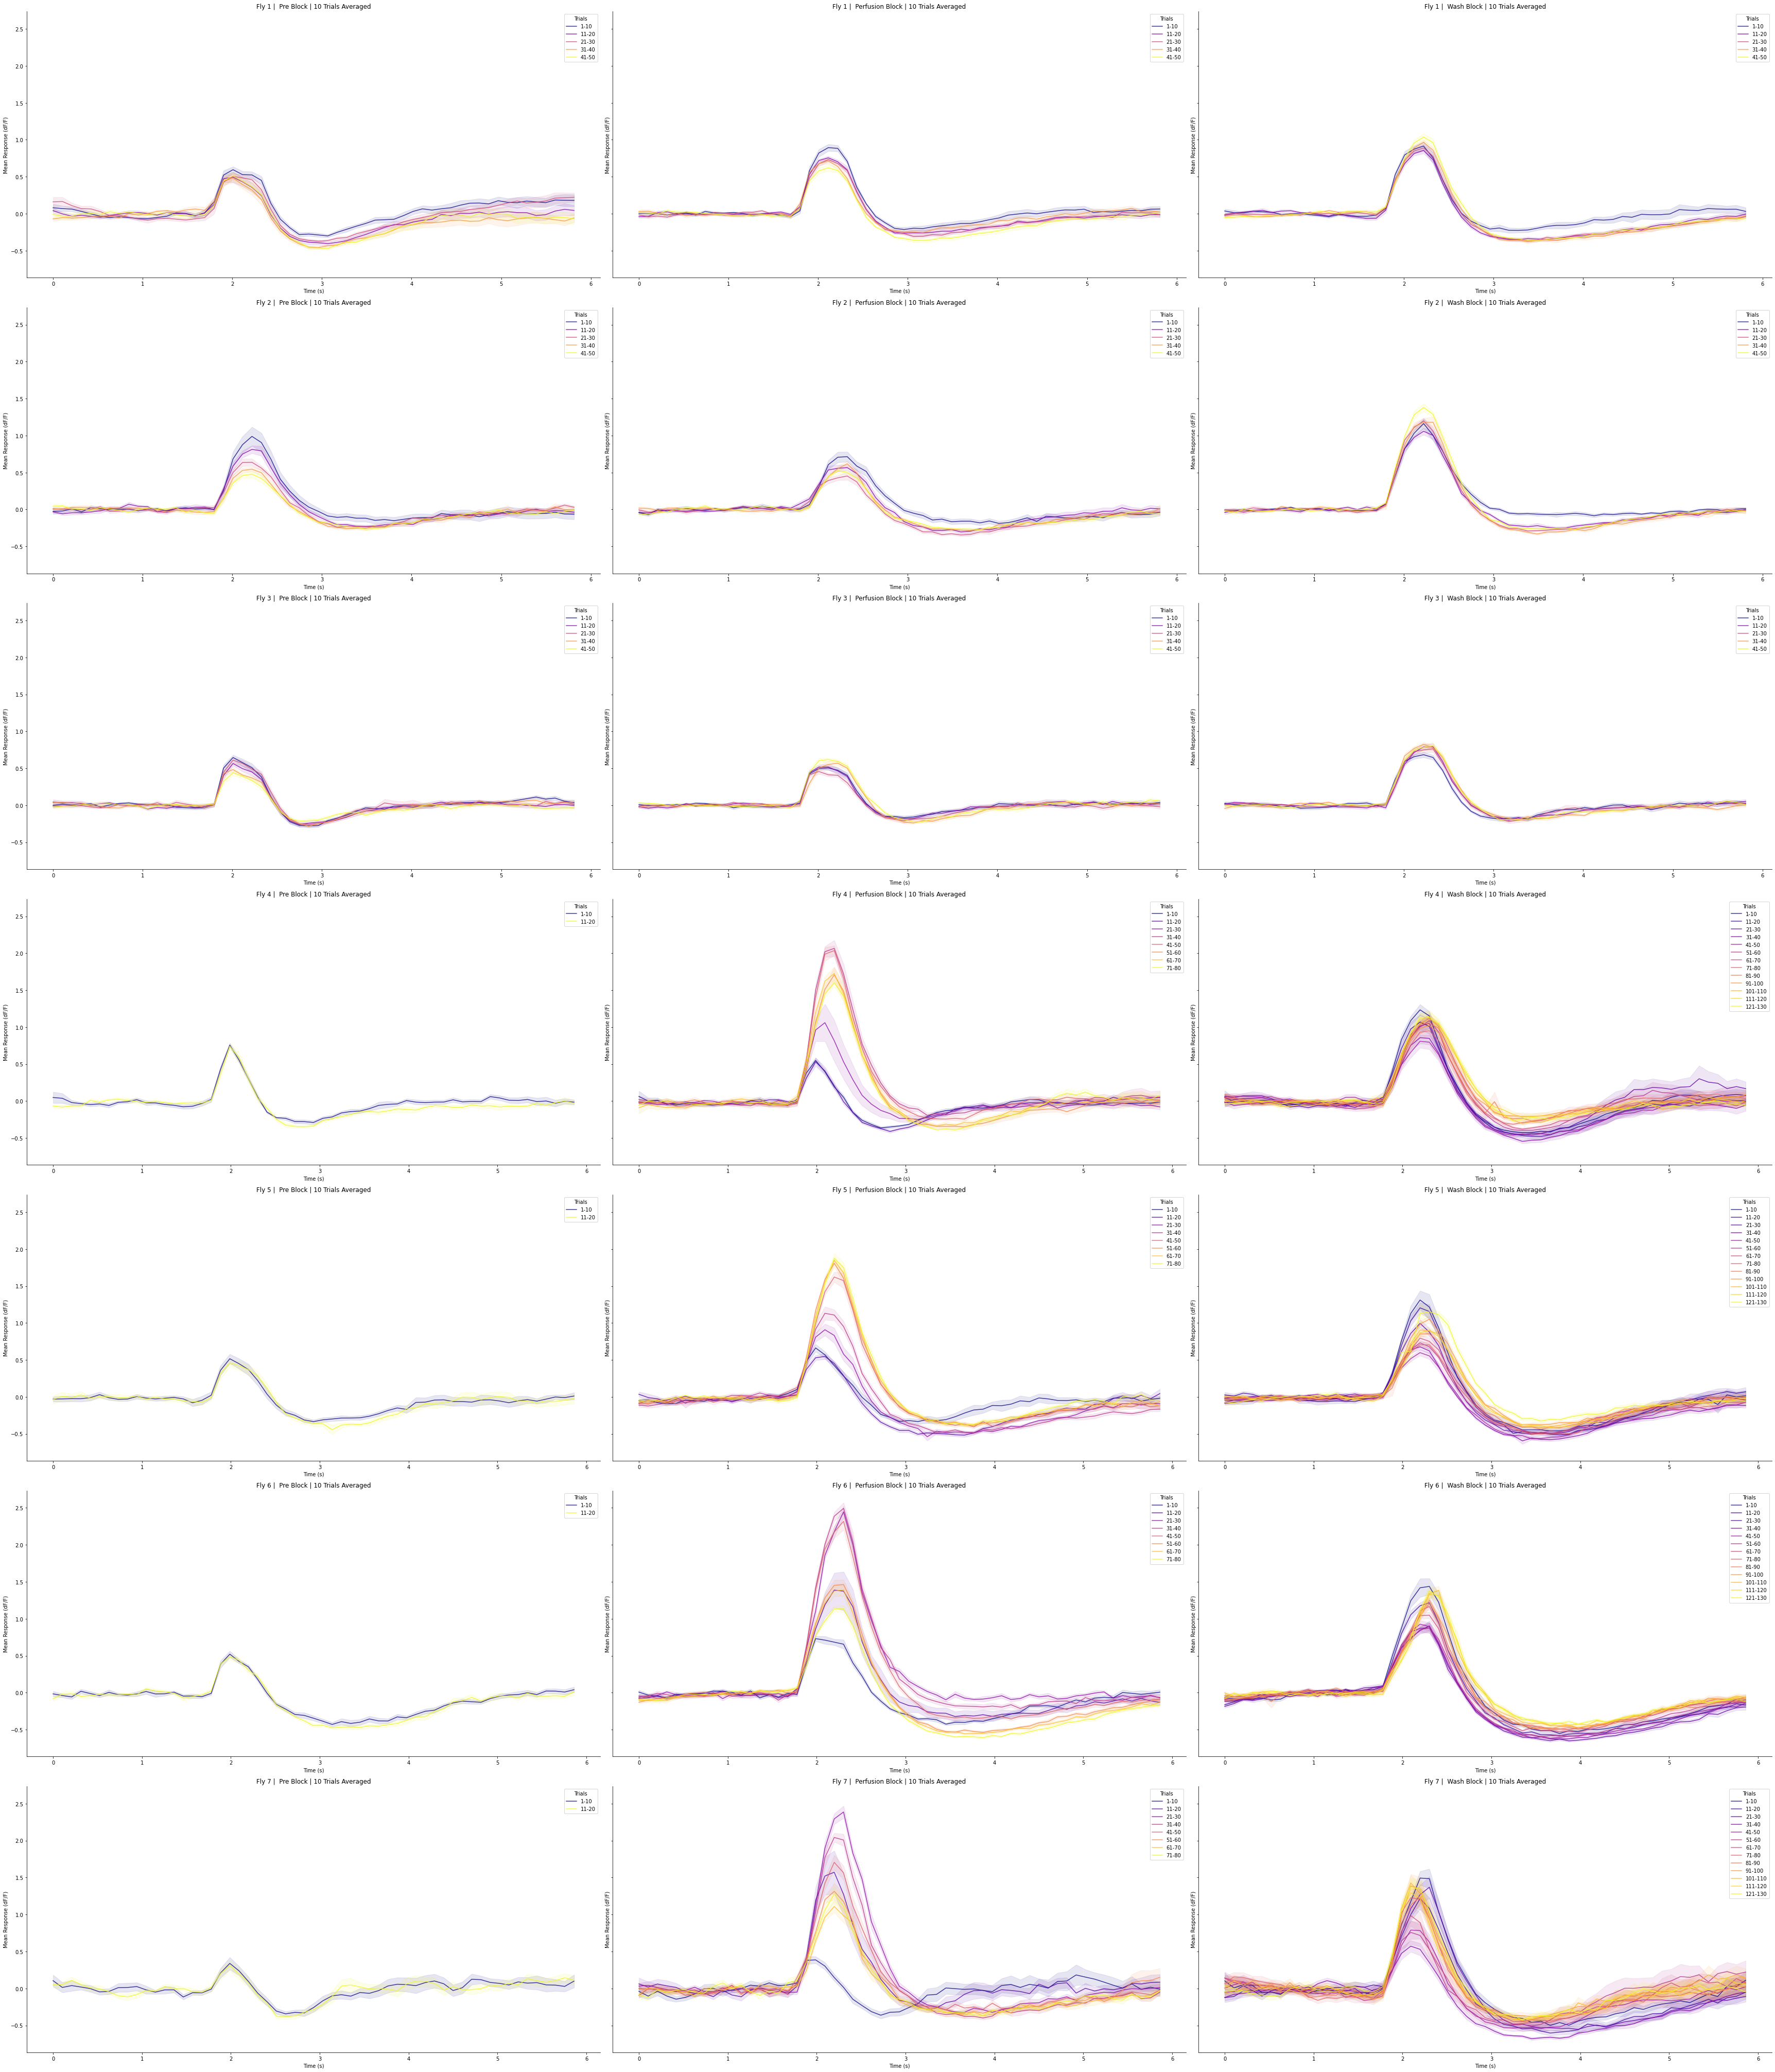

In [235]:
which_layer = all_prox
which_list = all_fly_list_prox
which_str = 'all_prox'
every_n = 10
save_fig = True

# Plotting the whole trace
exp_count = len(which_layer[0]) # number of experiments# set the color map
cmap = plt.get_cmap('Set3') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.0, 1.0, 12)]

# First figure
fh, ax = plt.subplots(exp_count, 1, figsize=(16, 8*exp_count))
# Second figure
fh1, ax1 = plt.subplots(exp_count, len(exp_block_type), figsize=(16*3, 8*exp_count), sharey=True)
for block_ind in range(len(exp_block_type)):
    for exp_ind in range(exp_count):
        time_vector, epoch_response, mean_response, _, _, _, _, _, _, _, _, _, _, _, _, _ = getMetrics(which_layer[block_ind][exp_ind])    
        # Data for Figure 1 - mean across all trials        
        # Mean - dimensions are trials x time
        mean_across_rois = np.squeeze(mean_response.mean(axis=0))
        sem = np.squeeze(np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0]))
        sem_plus_across_rois = mean_across_rois + sem
        sem_minus_across_rois = mean_across_rois - sem
        # Plot it
        ax[exp_ind].plot(time_vector, mean_across_rois, color=colors[block_ind], label=exp_block_type[block_ind])
        ax[exp_ind].fill_between(time_vector, sem_plus_across_rois, sem_minus_across_rois, color=colors[block_ind], alpha=0.3)
        # axes handling
        ax[exp_ind].set_title(f'Fly {which_list[exp_ind]}')
        ax[exp_ind].grid(color='white', alpha=0.2)
        ax[exp_ind].legend(facecolor='black', edgecolor='black', labelcolor='white')
        ax[exp_ind].set_xlabel('Time (s)')
        ax[exp_ind].set_ylabel('Mean Response (dF/F)')
        ax[exp_ind].spines['right'].set_visible(False)
        ax[exp_ind].spines['top'].set_visible(False)
        # Super title
        #fh.suptitle('Mean Response by Fly ROIs', fontsize=20)

        # Data for Figure 2 - mean across every 10 trials
        # loop where every every_n trials are averaged
        # first, average epoch_response across ROIs. it is ROIs x trials x time
        epoch_response_mean = np.mean(epoch_response, axis=0)
        cmap1 = plt.get_cmap('plasma')
        colors1 = [cmap1(i) for i in np.linspace(0, 1, epoch_response_mean.shape[0]//every_n)]
        for i in range(0, epoch_response_mean.shape[0], every_n):
            # Mean - dimensions are trials x time
            mean_every_ten = epoch_response_mean[i:i+every_n, :].mean(axis=0)
            sem_every_ten = np.std(epoch_response_mean[i:i+every_n, :], axis=0) / np.sqrt(epoch_response_mean[i:i+every_n, :].shape[0])
            sem_plus_every_ten = mean_every_ten + sem_every_ten
            sem_minus_every_ten = mean_every_ten - sem_every_ten
            # Plot it
            ax1[exp_ind, block_ind].plot(time_vector, mean_every_ten, color=colors1[i//every_n], alpha=0.8, label=f'{i+1}-{i+every_n}')
            ax1[exp_ind, block_ind].fill_between(time_vector, sem_plus_every_ten, sem_minus_every_ten, color=colors1[i//every_n], alpha=0.1)
            # axes handling
            ax1[exp_ind, block_ind].set_title(f'Fly {which_list[exp_ind]} |  {exp_block_type[block_ind]} Block | {every_n} Trials Averaged')
            ax1[exp_ind, block_ind].grid(color='white', alpha=0.2)
            ax1[exp_ind, block_ind].set_xlabel('Time (s)')
            ax1[exp_ind, block_ind].set_ylabel('Mean Response (dF/F)')
            ax1[exp_ind, block_ind].spines['right'].set_visible(False)
            ax1[exp_ind, block_ind].spines['top'].set_visible(False)
            ax1[exp_ind, block_ind].legend(title='Trials', loc='upper right')
            #fh1.suptitle(f'Mean Response by Fly, every {every_n} Trials Averaged', fontsize=20)

fh.set_tight_layout(True)
fh1.set_tight_layout(True)

if save_fig:
    fh.savefig(f'{save_directory}/mean_response_by_fly.{which_str}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    fh1.savefig(f'{save_directory}/mean_response_by_fly_every_{every_n}_trials.{which_str}.pdf', dpi=300, bbox_inches='tight', transparent=True)

/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_27157/2414113296.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  minmax_fig.savefig(f'{save_directory}/minmax_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.pdf', dpi=300, bbox_inches='tight', transparent=True)
/Users/averykrieger/envs/stim_analysis/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


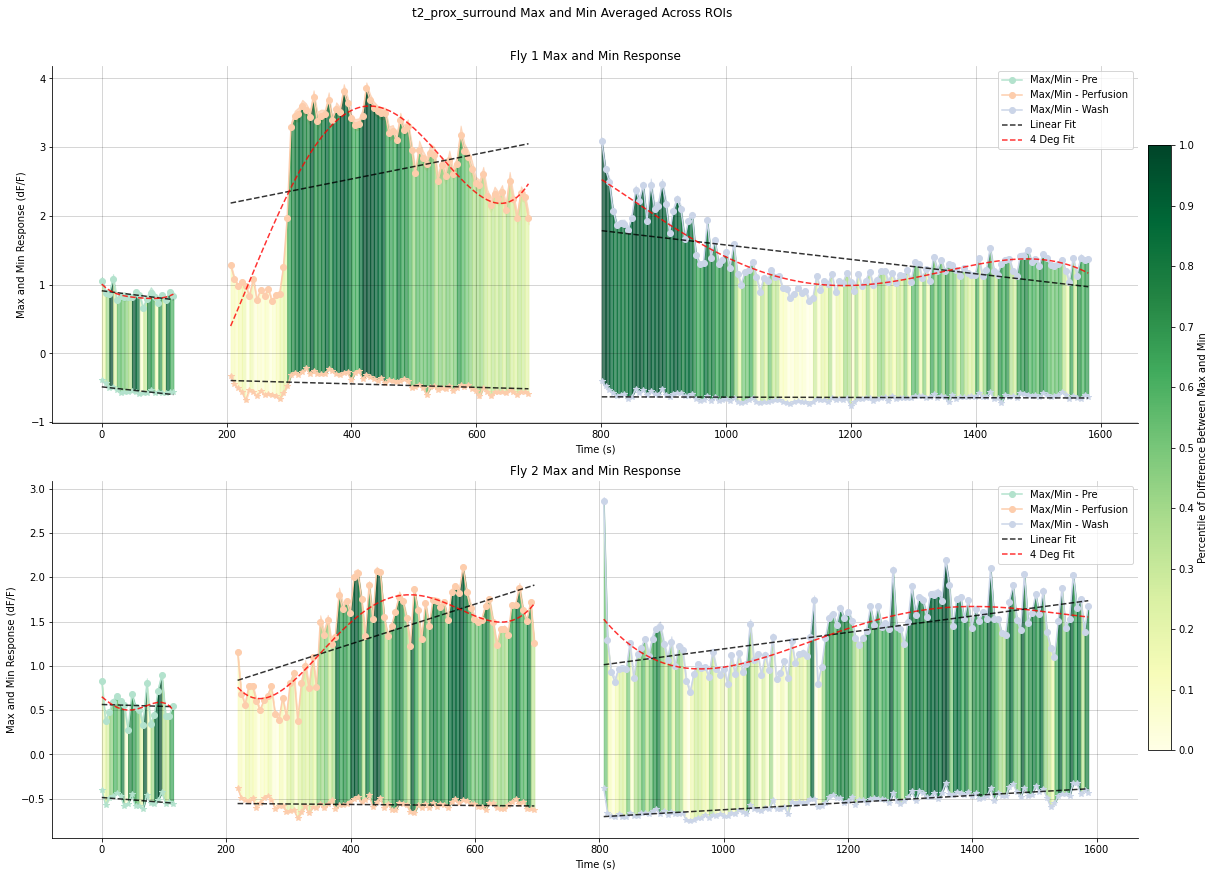

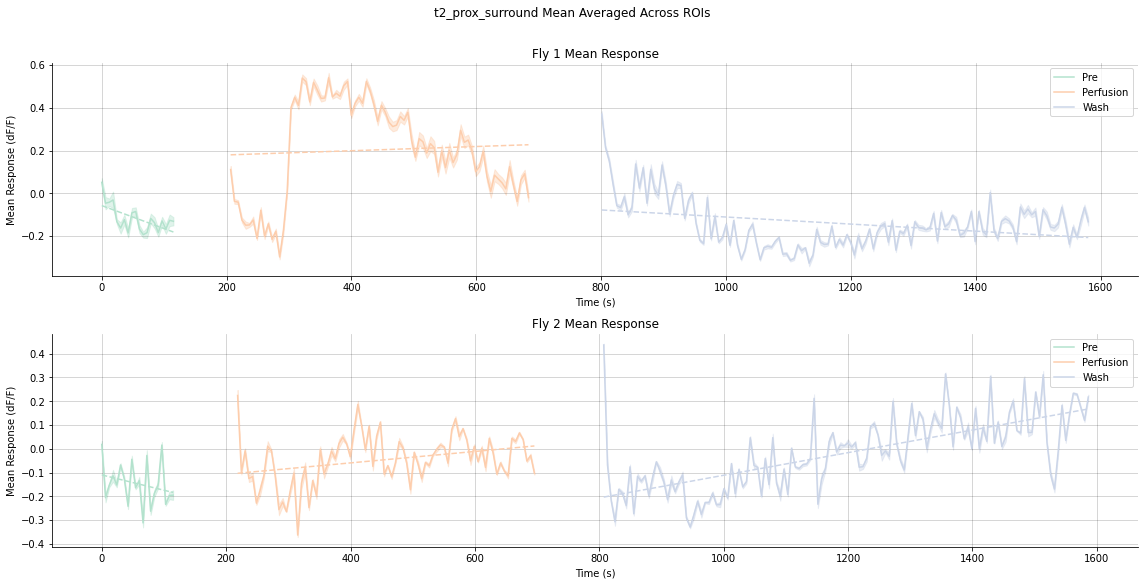

In [237]:
# plot the min and max values separately from the mean values
which_layer = t2_prox_surround # t2_prox_all | all_prox | all_dist | t2_prox_center | t2_prox_surround
which_str = 't2_prox_surround' # 't2_prox_all' | 'all_prox' | 'all_dist' | t2_center_surround_list| t2_prox_center | t2_prox_surround
which_list = all_fly_list_prox # t2_prox_list | all_fly_list_prox | all_fly_list_dist | t2_center_surround_list
skip_trials = 0
n_poly = 4
alpha_fill = True
save_fig = True

exp_count = len(which_layer[0]) # number of experiments# set the color map
minmax_fig, minmax_ax = plt.subplots(exp_count, 1, figsize=(16, 6*exp_count))
mean_fig, mean_ax = plt.subplots(exp_count, 1, figsize=(16, 4*exp_count))
# set the color map
cmap = plt.get_cmap('Pastel2') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.0, 1.0, 8)]
percent_cmap = plt.get_cmap('YlGn') # also 'PuRd' | 'Oranges' | 'Greens'
percent_colors = [percent_cmap(i) for i in np.linspace(0, 1, 101)] # 101 because we want 0-100%

t0 = 0
for exp_ind in range(exp_count):
    for block_ind in range(len(exp_block_type)):
        _, _, _, _, _, _, _, _, _, mean_by_trial, max_by_trial, min_by_trial, sem_mean_by_trial, sem_max_by_trial, sem_min_by_trial, epoch_timestamps = getMetrics(which_layer[block_ind][exp_ind])
        if block_ind == 0:
            t0 = epoch_timestamps[0]
        # subtract the first timepoint from all timepoints to get a relative time to 0
        plot_timestamps = epoch_timestamps - t0
        # plot the max_across_rois
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], max_by_trial[skip_trials:], marker='o', color=colors[block_ind], label=(f'Max/Min - {exp_block_type[block_ind]}'))
        minmax_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], max_by_trial[skip_trials:] + sem_max_by_trial[skip_trials:], max_by_trial[skip_trials:] - sem_max_by_trial[skip_trials:], 
                                        color=colors[block_ind], alpha=0.7)
        # plot linear regression of max_across_rois
        slope, intercept, r_value, p_value, std_err = st.linregress(plot_timestamps[skip_trials:], max_by_trial[skip_trials:])
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], intercept + slope*plot_timestamps[skip_trials:], 
                                color='k', linestyle='dashed', alpha=0.8, label='Linear Fit' if block_ind == 2 else None)
        # Plot a polynomial fit of max_across_rois with degree n_poly
        z = np.polyfit(plot_timestamps[skip_trials:], max_by_trial[skip_trials:], n_poly)
        p = np.poly1d(z)
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], p(plot_timestamps[skip_trials:]), 
                                alpha=0.8, color='r', linestyle='dashed', 
                                label=f'{n_poly} Deg Fit' if block_ind == 2 else None)
        # plot the min_across_rois
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], min_by_trial[skip_trials:], marker='*', color=colors[block_ind],) # label=(f'Min - {exp_block_type[block_ind]}'))
        minmax_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], min_by_trial[skip_trials:] + sem_min_by_trial[skip_trials:], min_by_trial[skip_trials:] - sem_min_by_trial[skip_trials:], 
                                        color=colors[block_ind], alpha=0.7)
        # plot linear regression of min_across_rois
        slope, intercept, r_value, p_value, std_err = st.linregress(plot_timestamps[skip_trials:], min_by_trial[skip_trials:])
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], intercept + slope*plot_timestamps[skip_trials:], color='k', linestyle='dashed', alpha=0.8)
        # fill between the min and max values
        
        if alpha_fill:
            # calculate the difference between the max and min values
            minmax_diff = max_by_trial[skip_trials:] - min_by_trial[skip_trials:]
            
            for i in range(len(minmax_diff)-1):
                diff_percent = int(st.percentileofscore(minmax_diff, minmax_diff[i+1]))
                minmax_ax[exp_ind].fill_between([plot_timestamps[skip_trials:][i], plot_timestamps[skip_trials:][i+1]], 
                                                [min_by_trial[skip_trials:][i], min_by_trial[skip_trials:][i+1]], 
                                                [max_by_trial[skip_trials:][i], max_by_trial[skip_trials:][i+1]],
                                                color=percent_colors[diff_percent], alpha=0.7)

        else:
            minmax_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], min_by_trial[skip_trials:], max_by_trial[skip_trials:], color=colors[5], alpha=0.7)
        # Axes settings:
        minmax_ax[exp_ind].set_title(f'Fly {which_list[exp_ind]} Max and Min Response')
        minmax_ax[exp_ind].set_ylabel('Max and Min Response (dF/F)')
        minmax_ax[exp_ind].set_xlabel('Time (s)')
        minmax_ax[exp_ind].legend()
        minmax_ax[exp_ind].grid(alpha=0.2, color='black')
        minmax_ax[exp_ind].spines['top'].set_visible(False)
        minmax_ax[exp_ind].spines['right'].set_visible(False)
        minmax_fig.suptitle(f'{which_str} Max and Min Averaged Across ROIs', y=1.01)
        minmax_fig.set_tight_layout(True)

        # mean fig
        # plot the mean_across_rois
        mean_ax[exp_ind].plot(plot_timestamps[skip_trials:], mean_by_trial[skip_trials:], color=colors[block_ind], label=exp_block_type[block_ind])
        mean_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], mean_by_trial[skip_trials:] + sem_mean_by_trial[skip_trials:], mean_by_trial[skip_trials:] - sem_mean_by_trial[skip_trials:], color=colors[block_ind], alpha=0.4)
        # plot linear regression of mean_across_rois
        slope, intercept, r_value, p_value, std_err = st.linregress(plot_timestamps[skip_trials:], mean_by_trial[skip_trials:])
        mean_ax[exp_ind].plot(plot_timestamps[skip_trials:], intercept + slope*plot_timestamps[skip_trials:], color=colors[block_ind], linestyle='dashed',)
        # Axes settings:
        mean_ax[exp_ind].set_ylabel('Mean Response (dF/F)')
        mean_ax[exp_ind].set_title(f'Fly {which_list[exp_ind]} Mean Response')
        mean_ax[exp_ind].set_xlabel('Time (s)')
        mean_ax[exp_ind].legend()
        mean_ax[exp_ind].grid(alpha=0.2, color='black')
        mean_ax[exp_ind].spines['top'].set_visible(False)
        mean_ax[exp_ind].spines['right'].set_visible(False)
        mean_fig.suptitle(f'{which_str} Mean Averaged Across ROIs', y=1.01)
        mean_fig.set_tight_layout(True)

# add a single colorbar for diff_percent to the entire figure with padding
if alpha_fill:
    cbar_ax = minmax_fig.add_axes([1, 0.15, 0.02, 0.7])
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=percent_cmap, orientation='vertical', alpha=0.7)
    cbar.set_label('Percentile of Difference Between Max and Min')
    cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, .6, .7, .8, .9, 1])


# save the figures
if save_fig:
    minmax_fig.savefig(f'{save_directory}/minmax_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    mean_fig.savefig(f'{save_directory}/mean_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
plt.close('all')

In [ ]:
same plot as above but center vs surround for each ROI